In [271]:
#ホールドアウト法
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

In [272]:
df_ks = pd.read_csv("ks-projects-201801.csv")

In [273]:
display(df_ks)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [274]:
#欠損値の確認
df_ks.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [275]:
#stateのsuccessfulを1, failedを0とする
df_ks.loc[df_ks["state"] == "successful", "state"] = 1
df_ks.loc[df_ks["state"] == "failed", "state"] = 0
#stateの1、0のみを抽出する
df_ks = df_ks[(df_ks["state"] == 1) | (df_ks["state"] == 0)]

In [276]:
country = ['US', 'GB', 'CA', 'AU', 'DE', 'FR', 'NL', 'IT', 'ES', 'SE', 'MX', 'NZ', 'DK', 'IE', 'CH', 'NO', 'BE', 'AT', 'HK', 'SG', 'N,0"', 'LU', 'JP']
for i in range(23):
    df_ks.loc[df_ks["country"] == country[i], "country"] = i
df_ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,1,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,0,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,0,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,0,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,0,52375.0,52375.0,50000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,0,4,0,0.0,154.0,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,0,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,0,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,0,200.0,200.0,15000.00


In [277]:
#main_categoryをダミー変数に変換
main_category = ["Film & Video", "Music", "Publishing", "Games", "Technology", "Art", "Design", "Food", "Fashion", "Theater", "Comics", "Photography", "Crafts", "Journalism", "Dance"]
for i in range(15):
    df_ks.loc[df_ks["main_category"] == main_category[i], "main_category"] = i

In [278]:
#currencyをダミー変数に変換
df_ks["currency"].value_counts()
currency = ["USD", "GBP", "EUR", "CAD", "AUD", "SEK", "MXN", "NZD", "DKK", "CHF", "NOK", "HKD", "SGD", "JPY"]
for i in range(14):
    df_ks.loc[df_ks["currency"] == currency[i], "currency"] = i

In [279]:
#deadlineとlaunchedからdays(募集期間)を計算
df_ks['deadline'] = pd.to_datetime(df_ks["deadline"])
df_ks["launched"] = pd.to_datetime(df_ks["launched"])
df_ks["days"] = (df_ks["deadline"] - df_ks["launched"]).dt.days
display(df_ks)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,2,1,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,1,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,0,0,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,0,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,0,0,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,0,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,1,0,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,0,1.0,1.0,5000.00,29
5,1000014025,Monarch Espresso Bar,Restaurants,7,0,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,0,52375.0,52375.0,50000.00,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,7,0,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,0,4,0,0.0,154.0,6500.00,29
378657,999977640,The Tribe,Narrative Film,0,0,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,0,155.0,155.0,1500.00,26
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,0,0,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,0,20.0,20.0,15000.00,45
378659,999987933,BioDefense Education Kit,Technology,4,0,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,0,200.0,200.0,15000.00,30


In [280]:
#クラウドファンディングが終る前に入手できない変数や不要と考えられる説明変数を取り除く
df_ks = df_ks.drop(["ID", "name", "category", "deadline", "launched", "pledged", "usd pledged", "usd_pledged_real"], axis = 1)
display(df_ks)

,main_category,currency,goal,state,backers,country,usd_goal_real,days
0,2,1,1000.0,0,0,1,1533.95,58
1,0,0,30000.0,0,15,0,30000.00,59
2,0,0,45000.0,0,3,0,45000.00,44
3,1,0,5000.0,0,1,0,5000.00,29
5,7,0,50000.0,1,224,0,50000.00,34
...,...,...,...,...,...,...,...,...
378654,7,0,6500.0,0,4,0,6500.00,29
378657,0,0,1500.0,0,5,0,1500.00,26
378658,0,0,15000.0,0,1,0,15000.00,45
378659,4,0,15000.0,0,6,0,15000.00,30


In [281]:
#まずはDAY1と同数・同種の説明変数で学習を行い、精度を比較する

In [282]:
y = df_ks["state"].values
y = y.astype('int')
X = df_ks.drop(["state","main_category", "currency", "country"], axis = 1).values

In [283]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

In [284]:
clf = SGDClassifier (loss = "log", penalty = "none", max_iter = 10000, fit_intercept = True, random_state = 1234, tol = 1e-3)
clf.fit(X_train, y_train)

SGDClassifier(loss='log', max_iter=10000, penalty='none', random_state=1234)

In [285]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [286]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 88.194%
適合率（Precision） = 96.553%
再現率（Recall） = 83.141%
F1値（F1-score） = 89.347%


In [287]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [288]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 88.201%
適合率（Precision） = 96.602%
再現率（Recall） = 83.226%
F1値（F1-score） = 89.417%


In [289]:
#ホールドアウト法でDAY1宿題と同数・同種の説明変数を用いて学習を行った場合、DAY1宿題との精度の比較をすると、Precisonがわずかに向上しているが、その他の指標は全て精度が下がっている。過度な情報の削減が原因として考えられるため、説明変数としてstate以外全てを用いてみる。

In [290]:
y = df_ks["state"].values
y = y.astype('int')
X = df_ks.drop("state", axis = 1).values

In [291]:
display(df_ks)

,main_category,currency,goal,state,backers,country,usd_goal_real,days
0,2,1,1000.0,0,0,1,1533.95,58
1,0,0,30000.0,0,15,0,30000.00,59
2,0,0,45000.0,0,3,0,45000.00,44
3,1,0,5000.0,0,1,0,5000.00,29
5,7,0,50000.0,1,224,0,50000.00,34
...,...,...,...,...,...,...,...,...
378654,7,0,6500.0,0,4,0,6500.00,29
378657,0,0,1500.0,0,5,0,1500.00,26
378658,0,0,15000.0,0,1,0,15000.00,45
378659,4,0,15000.0,0,6,0,15000.00,30


In [292]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

In [293]:
clf = SGDClassifier (loss = "log", penalty = "none", max_iter = 10000, fit_intercept = True, random_state = 1234, tol = 1e-3)
clf.fit(X_train, y_train)

SGDClassifier(loss='log', max_iter=10000, penalty='none', random_state=1234)

In [294]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [295]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 88.304%
適合率（Precision） = 96.577%
再現率（Recall） = 83.309%
F1値（F1-score） = 89.454%


In [296]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [297]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 88.293%
適合率（Precision） = 96.627%
再現率（Recall） = 83.362%
F1値（F1-score） = 89.506%


In [298]:
#説明変数として7個採用した場合でも精度はほとんど変わらず、DAY1と比較するとPrecisionだけがわずかに向上した。

In [299]:
#交差検証法
n_split = 5

cross_valid_accuracy = 0
cross_valid_precision = 0
cross_valid_recall = 0
cross_valid_f1_score = 0

split_num=1

for train_idx, test_idx in KFold(n_splits = n_split, shuffle = True, random_state = 1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    clf = SGDClassifier(loss = "log", penalty = "none", max_iter = 10000, fit_intercept = True, random_state = 1234, tol = 1e-3)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    
    accuracy =  accuracy_score(y_test, y_pred_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))
    print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
    print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))
    print()
    
    cross_valid_accuracy += accuracy 
    cross_valid_precision += precision[0]
    cross_valid_recall += recall[0] 
    cross_valid_f1_score += f1_score[0] 
    split_num += 1
    
final_accuracy =  cross_valid_accuracy / n_split
final_precision = cross_valid_precision / n_split
final_recall = cross_valid_recall / n_split
final_f1_score = cross_valid_f1_score / n_split

print('正答率（Accuracy） = {:.3f}%'.format(100 * final_accuracy))
print('適合率（Precision） = {:.3f}%'.format(100 * final_precision))
print('再現率（Recall） = {:.3f}%'.format(100 * final_recall))
print('F1値（F1-score） = {:.3f}%'.format(100 * final_f1_score))

Fold 1
正答率（Accuracy） = 86.981%
適合率（Precision） = 96.342%
再現率（Recall） = 81.351%
F1値（F1-score） = 88.214%

Fold 2
正答率（Accuracy） = 89.327%
適合率（Precision） = 96.310%
再現率（Recall） = 85.327%
F1値（F1-score） = 90.486%

Fold 3
正答率（Accuracy） = 87.155%
適合率（Precision） = 96.660%
再現率（Recall） = 81.206%
F1値（F1-score） = 88.262%

Fold 4
正答率（Accuracy） = 86.362%
適合率（Precision） = 95.997%
再現率（Recall） = 80.476%
F1値（F1-score） = 87.554%

Fold 5
正答率（Accuracy） = 86.422%
適合率（Precision） = 96.222%
再現率（Recall） = 80.378%
F1値（F1-score） = 87.589%

正答率（Accuracy） = 87.249%
適合率（Precision） = 96.306%
再現率（Recall） = 81.747%
F1値（F1-score） = 88.421%


In [300]:
#決定木
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [301]:
y = df_ks["state"].values
y = y.astype('int')
X = df_ks.drop("state", axis = 1).values

In [302]:
display(df_ks)

,main_category,currency,goal,state,backers,country,usd_goal_real,days
0,2,1,1000.0,0,0,1,1533.95,58
1,0,0,30000.0,0,15,0,30000.00,59
2,0,0,45000.0,0,3,0,45000.00,44
3,1,0,5000.0,0,1,0,5000.00,29
5,7,0,50000.0,1,224,0,50000.00,34
...,...,...,...,...,...,...,...,...
378654,7,0,6500.0,0,4,0,6500.00,29
378657,0,0,1500.0,0,5,0,1500.00,26
378658,0,0,15000.0,0,1,0,15000.00,45
378659,4,0,15000.0,0,6,0,15000.00,30


In [303]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)
print("X_train =",X_train.shape)
print("y_train =",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train = (265340, 7)
y_train = (265340,)
X_test (66335, 7)
y_test (66335,)


In [304]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)

In [305]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [306]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 84.137%
適合率（Precision） = 91.619%
再現率（Recall） = 80.744%
F1値（F1-score） = 85.839%


In [307]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [308]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 84.118%
適合率（Precision） = 91.791%
再現率（Recall） = 80.699%
F1値（F1-score） = 85.888%


[0.        0.        0.        0.8659877 0.        0.1340123 0.       ]


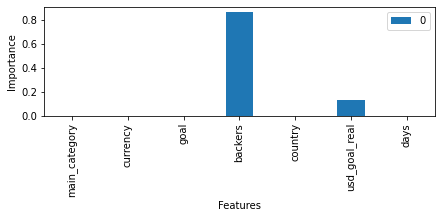

In [309]:
#重要な説明変数を調べる
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=["main_category","currency", "goal", "backers", "country", "usd_goal_real", "days"]).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [310]:
#決定木についてパラメータチューニング(交差探索法)

In [311]:
parameters = {"max_depth":[1, 5, 10], "min_samples_leaf":[1, 5, 10], "min_samples_split":[1, 5, 10]}
model = DecisionTreeClassifier(criterion="gini", random_state=1234)
clf = GridSearchCV(model, parameters, cv=3)
clf.fit(X_train, y_train)
print(clf.best_params_, clf.best_score_)

C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\koji0\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\koji0\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5} 0.9271538401406477


In [312]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=1234)
clf = clf.fit(X_train, y_train)

In [313]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [314]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 93.344%
適合率（Precision） = 94.873%
再現率（Recall） = 93.896%
F1値（F1-score） = 94.382%


In [315]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [316]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 92.862%
適合率（Precision） = 94.580%
再現率（Recall） = 93.435%
F1値（F1-score） = 94.004%


In [317]:
#パラメータチューニング後で、評価指標が大幅に向上した

In [318]:
#ランダムフォレスト・アダブーストでも精度を出してみる

In [319]:
#ランダムフォレスト

In [320]:
from sklearn.ensemble import RandomForestClassifier

In [321]:
y = df_ks["state"].values
y = y.astype('int')
X = df_ks.drop("state", axis = 1).values

In [322]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

In [323]:
clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini", min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=10,
                       random_state=1234)

In [324]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [325]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 84.518%
適合率（Precision） = 83.818%
再現率（Recall） = 91.704%
F1値（F1-score） = 87.584%


In [326]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [327]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 84.648%
適合率（Precision） = 84.109%
再現率（Recall） = 91.688%
F1値（F1-score） = 87.735%


[0.04298021 0.00905133 0.28851166 0.4537562  0.01574852 0.15642602
 0.03352606]


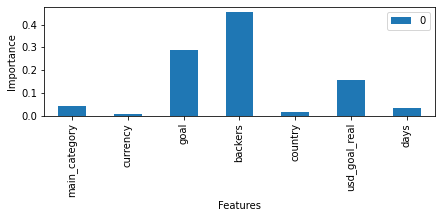

In [328]:
#重要な説明変数を調べる
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=["main_category","currency", "goal", "backers", "country", "usd_goal_real", "days"]).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [329]:
#ランダムフォレストについてパラメータチューニング(交差探索法)

In [330]:
parameters = {"n_estimators":[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = RandomForestClassifier(max_depth=2, criterion="gini", min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf = GridSearchCV(model, parameters, cv=3)
clf.fit(X_train, y_train)
print(clf.best_params_, clf.best_score_)

{'n_estimators': 40} 0.8779528013897892


In [331]:
clf2 = RandomForestClassifier(n_estimators=clf.best_params_, max_depth=2, criterion="gini", min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=2, min_samples_leaf=2,
                                              random_state=1234),
             param_grid={'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [332]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [333]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 87.489%
適合率（Precision） = 90.379%
再現率（Recall） = 88.398%
F1値（F1-score） = 89.377%


In [334]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [335]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 87.441%
適合率（Precision） = 90.505%
再現率（Recall） = 88.293%
F1値（F1-score） = 89.385%


In [336]:
#パラメータチューニング後で、再現率が3%程度下がっているが、その他の指標が大幅に向上した

In [337]:
#アダブースト

In [338]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [339]:
y = df_ks["state"].values
y = y.astype('int')
X = df_ks.drop("state", axis = 1).values

In [340]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=1234, criterion="gini"), n_estimators=10, random_state=1234)
clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_leaf=2,
                                                         random_state=1234),
                   n_estimators=10, random_state=1234)

In [341]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [342]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 92.461%
適合率（Precision） = 94.333%
再現率（Recall） = 92.921%
F1値（F1-score） = 93.622%


In [343]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [344]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 92.493%
適合率（Precision） = 94.476%
再現率（Recall） = 92.897%
F1値（F1-score） = 93.680%


[0.21124295 0.         0.00344292 0.37477472 0.02444298 0.33340403
 0.05269241]


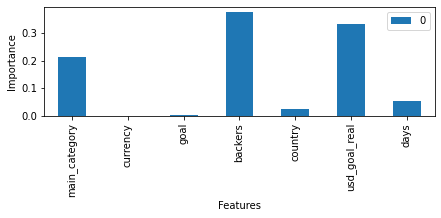

In [345]:
#重要な説明変数を調べる
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=["main_category","currency", "goal", "backers", "country", "usd_goal_real", "days"]).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [346]:
#アダブーストについてパラメータチューニング(交差探索)

In [353]:
parameters = {"n_estimators":[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=1234, criterion="gini"), random_state=1234)
clf = GridSearchCV(model, parameters, cv=3)
clf.fit(X_train, y_train)
print(clf.best_params_, clf.best_score_)

{'n_estimators': 70} 0.9311185620175174


In [354]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=1234, criterion="gini"), n_estimators=70, random_state=1234)
clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         min_samples_leaf=2,
                                                         random_state=1234),
                   n_estimators=70, random_state=1234)

In [355]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)

In [356]:
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 93.314%
適合率（Precision） = 94.781%
再現率（Recall） = 93.944%
F1値（F1-score） = 94.361%


In [357]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)

In [358]:
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 93.246%
適合率（Precision） = 94.920%
再現率（Recall） = 93.740%
F1値（F1-score） = 94.326%


In [359]:
#パラメータチューニング後、全ての指標が向上した

In [ ]:
#決定木による精度をさらに上げるために重要度が低い目的変数を取り除く

In [360]:
y = df_ks["state"].values
y = y.astype('int')
X = df_ks.drop(["state", "currency", "country"], axis = 1).values
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)
clf = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=3, min_samples_leaf=3, random_state=1234)

In [362]:
#決定木についてパラメータチューニング(交差探索法)
parameters = {"max_depth":[1, 5, 10], "min_samples_leaf":[1, 5, 10], "min_samples_split":[1, 5, 10]}
model = DecisionTreeClassifier(criterion="gini", random_state=1234)
clf = GridSearchCV(model, parameters, cv=3)
clf = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=1234)
clf = clf.fit(X_train, y_train)

In [363]:
#訓練データに対する予測を実行
y_pred_train = clf.predict(X_train)
#訓練データに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_train, y_pred_train)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_pred_train)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 93.320%
適合率（Precision） = 94.833%
再現率（Recall） = 93.896%
F1値（F1-score） = 94.362%


In [364]:
#テストデータに対する予測を実行
y_pred_test = clf.predict(X_test)
#テストデータに対するaccuracy, precision, recall, f1を計算 
accuracy =  accuracy_score(y_test, y_pred_test)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 92.871%
適合率（Precision） = 94.550%
再現率（Recall） = 93.486%
F1値（F1-score） = 94.015%


In [ ]:
#precision以外は僅かに精度が上がった